# Notebook designed to study the differential radial flow coefficient $v_0(p_T)$

* First: plotting ATLAS PbPb 5.02 TeV experimental data

In [8]:
# ------------------ Load ATLAS HEPData tables ------------------
import pandas as pd # use pandas to open a csv file
import matplotlib.pyplot as plt

# Let's look at the raw content of the first few lines to infer the structure
with open('HEPData-ins2907010-v1-Figure_4a_cent7.csv', 'r') as file:
    lines = [next(file) for _ in range(10)]
lines

['#: table_doi: 10.17182/hepdata.158359.v1/t20\n',
 '#: name: Figure 4a_cent7\n',
 '#: description: Data from Figure 4, panel a, $v_{0}(p_{T})$ for $p^{ref}_{T}$ = 0.5-2 GeV, $\\eta_{gap}$=1, 50-60% Centrality\n',
 '#: data_file: figure_4a_cent7.yaml\n',
 '#: keyword cmenergies: 5020\n',
 '#: keyword observables: $v_{0}(p_{T})$\n',
 '#: keyword reactions: Pb+Pb —> CHARGED X\n',
 '#: keyword phrases: Radial Flow Fluctuation | $p_{T}$ Differential Radial Flow | Collectivity\n',
 '$p_{T}$ [GeV],$v_{0}(p_{T})$ (for 50-60% Centrality),statistical +,statistical -,systematic +,systematic -\n',
 '0.55231,-0.044431,9.1768e-05,-9.1768e-05,0.0013671,-0.0013671\n']

In [9]:
# Load CSV files, skipping comment lines (lines starting with #)
cent7 = pd.read_csv('HEPData-ins2907010-v1-Figure_4a_cent7.csv', comment='#')
cent8 = pd.read_csv('HEPData-ins2907010-v1-Figure_4a_cent8.csv', comment='#')

In [10]:
cent7.head() # inspecting the csv files (dataframe)

,$p_{T}$ [GeV],$v_{0}(p_{T})$ (for 50-60% Centrality),statistical +,statistical -,systematic +,systematic -
0,0.55231,-0.044431,0.000092,-0.000092,0.001367,-0.001367
1,0.64791,-0.035065,0.000129,-0.000129,0.001148,-0.001148
2,0.74831,-0.023929,0.000124,-0.000124,0.000972,-0.000972
3,0.84819,-0.013116,0.000134,-0.000134,0.000803,-0.000803
4,0.94830,-0.002188,0.000137,-0.000137,0.000721,-0.000721


In [11]:
cent7.keys() # columns names

Index(['$p_{T}$ [GeV]', '$v_{0}(p_{T})$ (for 50-60% Centrality)',
       'statistical +', 'statistical -', 'systematic +', 'systematic -'],
      dtype='object')

In [12]:
# Rename columns for easier handling
cent7.columns = ['pT', 'v0', 'stat_plus', 'stat_minus', 'sys_plus', 'sys_minus']
cent8.columns = ['pT', 'v0', 'stat_plus', 'stat_minus', 'sys_plus', 'sys_minus']
# Not necessary!

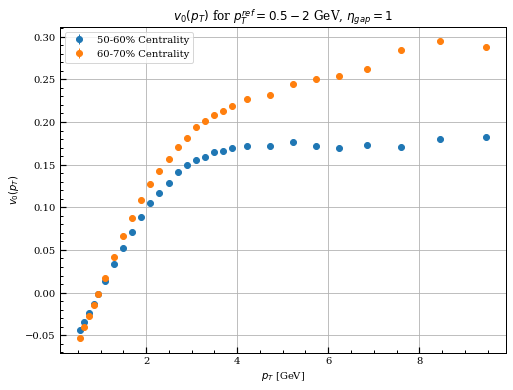

In [13]:
# Plotting: comparing both centralities without systematic uncertainties

plt.figure(figsize=(8,6))
plt.errorbar(cent7['pT'], cent7['v0'],
             yerr=[cent7['stat_plus'], cent7['stat_minus']],
             fmt='o', label='50-60% Centrality')
plt.errorbar(cent8['pT'], cent8['v0'],
             yerr=[cent8['stat_plus'], cent8['stat_minus']],
             fmt='o', label='60-70% Centrality')
plt.title('$v_0(p_T)$ for $p^{ref}_T=0.5-2$ GeV, $\eta_{gap}=1$')
plt.xlabel('$p_T$ [GeV]')
plt.ylabel('$v_0(p_T)$')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Adding systematic uncertainties
import numpy as np

# Calculate symmetric errors (absolute values)
stat_err7 = abs(cent7['stat_plus'])
stat_err8 = abs(cent8['stat_plus'])
sys_err7 = abs(cent7['sys_plus'])
sys_err8 = abs(cent8['sys_plus'])

# Total error (quadrature sum of stat + sys)
total_err7 = np.sqrt(stat_err7**2 + sys_err7**2)
total_err8 = np.sqrt(stat_err8**2 + sys_err8**2)


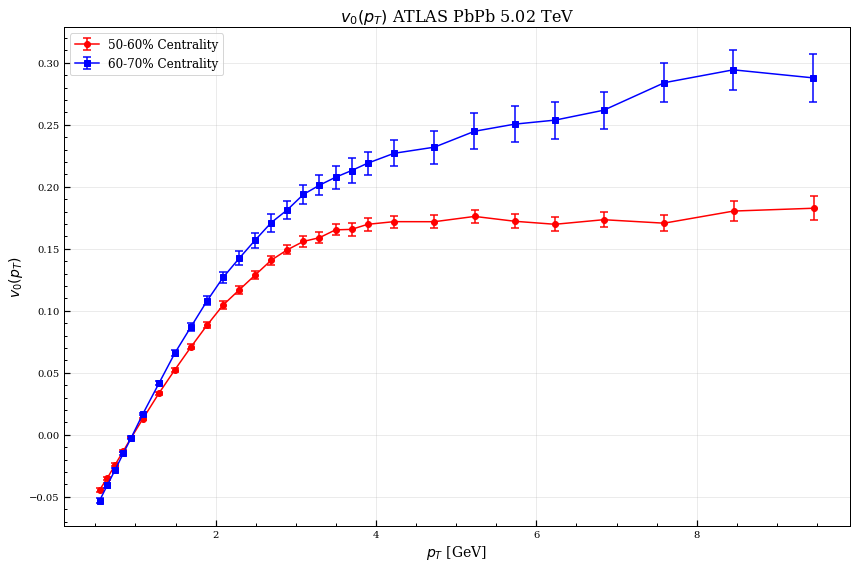

Error Comparison (first 5 points):
        pT        v0  Stat Error  Sys Error  Total Error
0  0.55231 -0.044431    0.000092   0.001367     0.001370
1  0.64791 -0.035065    0.000129   0.001148     0.001155
2  0.74831 -0.023929    0.000124   0.000972     0.000980
3  0.84819 -0.013116    0.000134   0.000803     0.000814
4  0.94830 -0.002188    0.000137   0.000721     0.000733


In [15]:
plt.figure(figsize=(12,8))

# Plot with total errors (stat + sys combined)
plt.errorbar(cent7['pT'], cent7['v0'], yerr=total_err7, 
             fmt='o-', label='50-60% Centrality', capsize=4, color='red', capthick=1.5, linewidth=1.5)
plt.errorbar(cent8['pT'], cent8['v0'], yerr=total_err8, 
             fmt='s-', label='60-70% Centrality', capsize=4, color='blue', capthick=1.5, linewidth=1.5)

plt.xlabel('$p_T$ [GeV]', fontsize=14)
plt.ylabel('$v_0(p_T)$', fontsize=14)
plt.title('$v_0(p_T)$ ATLAS PbPb 5.02 TeV', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print error comparison table
print("Error Comparison (first 5 points):")
comparison = pd.DataFrame({
    'pT': cent7['pT'].head(),
    'v0': cent7['v0'].head(),
    'Stat Error': stat_err7.head(),
    'Sys Error': sys_err7.head(),
    'Total Error': total_err7.head()
})
print(comparison)

In [22]:
cent7['pT'].shape # experimental data have 29 pt bins

(29,)

### Theoretical calculations: maximum a Posteriori (MAP) parameter for Chapman-Enskog (CE) viscous correction model   

it generates theoretical predictions for radial flow coefficients $v_0(p_T)$ and $v_0(p_T)/v_0$ using the MAP CE model for PbPb collisions at 2.76 TeV. 

Using idf = 0 : Grad
SystemsInfo = 
{'Pb-Pb-2760': {'proj': 'Pb', 'targ': 'Pb', 'sqrts': 2760, 'run_id': 'production_500pts_Pb_Pb_2760', 'n_design': 500, 'n_validation': 100, 'design_remove_idx': [289, 483, 324, 326, 459, 429, 334, 462, 242, 341, 406, 440, 377, 123, 447], 'npc': 10, 'MAP_obs_file': 'main.dat'}}
CMS Radial Flow Predictions - MAP CE Model
Pseudorapidity range: |eta| in [0.5, 2.4]
pT range (integrated): [0.5, 2.0] GeV
Centrality bins: [(50, 60), (60, 70)]


/tmp/ipykernel_7589/1705085931.py:261: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  MAP = np.fromfile('results_recalc_MAP_CE_Pb_2760_fine_pT.dat', dtype=result_dtype)


Loaded 5040 events

Centrality 50-60%: 504 events
  Integrated v_0: 0.0371 ± 0.0012

Centrality 60-70%: 504 events
  Integrated v_0: 0.0414 ± 0.0012


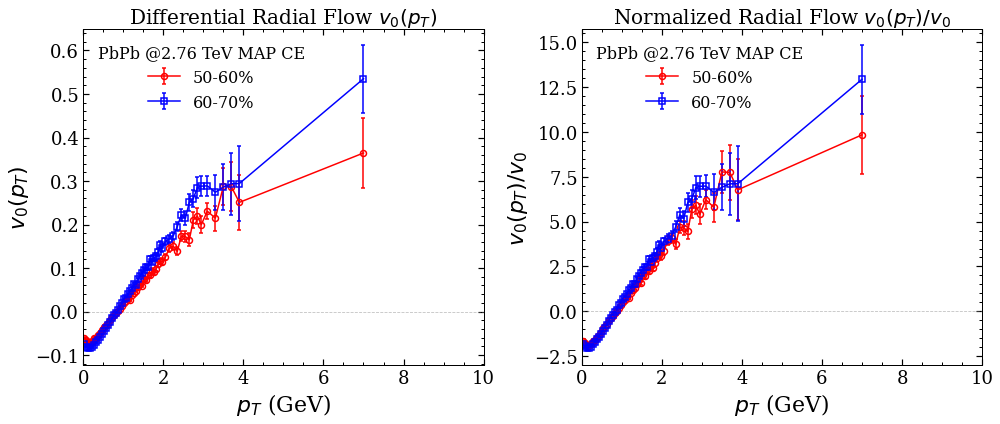


SUMMARY TABLE: v_0(p_T) at selected pT values

Centrality: 50-60%
Integrated v_0: 0.0371 ± 0.0012
------------------------------------------------------------
    pT [GeV]      v_0(pT)        error    v_0(pT)/v_0
------------------------------------------------------------
        0.53      -0.0352       0.0014        -0.9504
        0.78      -0.0088       0.0013        -0.2385
        1.02       0.0190       0.0017         0.5118
        1.52       0.0745       0.0039         2.0096
        2.05       0.1245       0.0070         3.3593
        3.10       0.2307       0.0188         6.2245

Centrality: 60-70%
Integrated v_0: 0.0414 ± 0.0012
------------------------------------------------------------
    pT [GeV]      v_0(pT)        error    v_0(pT)/v_0
------------------------------------------------------------
        0.53      -0.0446       0.0015        -1.0767
        0.78      -0.0079       0.0012        -0.1900
        1.02       0.0293       0.0020         0.7071
        1.5

In [1]:
#!/usr/bin/env python3
"""
Calculate CMS predictions for radial flow coefficients:
- v_0(p_T): differential radial flow
- v_0(p_T)/v_0: normalized differential radial flow

Kinematic cuts (CMS requirements):
- Pseudorapidity: |eta| in [0.5, 2.4]
- pT range for integrated observables: [0.5, 2.0] GeV
- Centralities: 50-60%, 60-70%
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from calculations_file_format_single_event import return_result_dtype

# ================== Constants ==================
masslist = np.array([0.13957, 0.49368, 0.93827, 1.18937, 1.32132])
particle_names = np.array(['pi', 'K', 'p', 'Sigma', 'Xi'])

ptcuts = np.array([0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2.,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.,3.2,3.4,3.6,3.8,4.,10.])
ptlist = (ptcuts[1:]+ptcuts[:-1])/2
ptbinwidth = ptcuts[1:]-ptcuts[:-1]
Npt = len(ptlist)

# CMS kinematic cuts
etarange = [0.5, 2.4]  # |eta| range for particles of interest
ptrange_integrated = [0.5, 2.0]  # pT range for integrated observables

# Centrality bins (CMS)
centbins = [(50, 60), (60, 70)]

# pT bins for differential observables:
#pt_bins_diff = np.array([[0.5,0.6], [0.6,0.7], [0.7,0.8], [0.8,0.9], 
#                         [0.9,1.0], [1.0,1.2], [1.2,1.5], [1.5,1.7],
#                         [1.7,2.0], [2.0,2.2], [2.2,2.5], [2.5,2.7],
#                         [2.7,3.0], [3.0,3.2], [3.2,3.5], [3.5,3.7], 
#                         [3.7,4.0], [4.0,4.2], [4.2,4.5], [4.5,4.7],
#                         [4.7,5.0], [5.0,5.5], [5.5,6.0], [6.0,6.5], 
#                         [6.5,7.0], [7.0,7.5], [7.5,8.0], [8.0,8.5], 
#                         [8.5,9.0], [9.0,10.0]])

deltaf = 1  # CE model

# ================== Plot style ==================
plt.rcParams["xtick.major.size"] = 6
plt.rcParams["ytick.major.size"] = 6
plt.rcParams["xtick.minor.size"] = 3
plt.rcParams["ytick.minor.size"] = 3
plt.rcParams["xtick.major.width"] = 1.2
plt.rcParams["ytick.major.width"] = 1.2
plt.rcParams["xtick.minor.width"] = 1.0
plt.rcParams["ytick.minor.width"] = 1.0
plt.rcParams["axes.linewidth"] = 1.0
plt.rcParams["lines.linewidth"] = 1.0
plt.rcParams["xtick.major.pad"] = 4
plt.rcParams["ytick.major.pad"] = 4
plt.rcParams["xtick.direction"] = 'in'
plt.rcParams["ytick.direction"] = 'in'
plt.rcParams["xtick.minor.visible"] = True
plt.rcParams["ytick.minor.visible"] = True
plt.rc('text', usetex=False)
plt.rc('font', family='serif')

fontsize = 18
cor = ['red', 'blue', 'green', 'orange', 'cyan', 'gray']
simb = ['o', 's', '^', 'v', 'd', 'H']
rot_labels = ['50-60%', '60-70%']

# ================== Helper functions ==================

def get_Q_0(alldata, delta_f_index, pid):
    """Extract Q_0 values for a specific particle type from all events."""
    return np.array([event[4][delta_f_index][pid][0] for event in alldata])

def get_nsamples(alldata, delta_f_index):
    """Get number of SMASH samples per hydro event."""
    nsamples = np.array([event[3][delta_f_index][0] for event in alldata], dtype=float)
    nsamples[nsamples == 0] = np.inf
    return nsamples

def jac(eta, mass, pt):
    """Jacobian for rapidity to pseudorapidity transformation."""
    return pt * np.cosh(eta) / np.sqrt(mass**2 + pt**2 * np.cosh(eta)**2)

def intjac(etarange, mass, pt):
    """Integrate Jacobian over pseudorapidity range."""
    return integrate.quad(jac, etarange[0], etarange[1], args=(mass, pt))

def jaclist(etarange):
    """Compute Jacobian factors for all mass-pT combinations."""
    nmass, npt = len(masslist), len(ptlist)
    jaclst = np.zeros((nmass, npt))
    for i in range(npt):
        for j in range(nmass):
            jaclst[j, i] = intjac(etarange, masslist[j], ptlist[i])[0]
    return jaclst

def cutQn(Qn, etarange):
    """Apply pseudorapidity cut via Jacobian transformation."""
    jac_factors = jaclist(etarange)
    Qn_temp = Qn.copy()
    Qn_temp /= 2  # Original data in rapidity range [-1, 1]
    Qn_temp *= jac_factors[None, :, :]  # [events, species, pT]
    return Qn_temp

def cutpt(Qn, ptbin):
    """Integrate Q vectors over pT range."""
    minbin = np.searchsorted(ptcuts, ptbin[0])
    maxbin = np.searchsorted(ptcuts, ptbin[1])
    return np.sum(Qn[:, :, minbin:maxbin], axis=2)

def sort_by_Nch(Qn_norm):
    """Sort events by charged multiplicity (descending)."""
    charged_mult = 2.0 * np.sum(Qn_norm[:, :3, :], axis=(1, 2))
    return np.argsort(charged_mult)[::-1]

def select_centrality(eventlist, centbins):
    """Group events by centrality percentiles."""
    nev = len(eventlist)
    groups = []
    for lo, hi in centbins:
        i0 = int(np.floor(lo / 100.0 * nev))
        i1 = int(np.floor(hi / 100.0 * nev))
        groups.append(eventlist[i0:i1])
    return groups

# ================== Jackknife error estimation ==================

def jackknifeerror(function, arg):
    """Compute jackknife error estimate."""
    val = function(arg)
    nevents = len(arg)
    jkdist = np.array([function(np.delete(arg, i, axis=0)) for i in range(nevents)])
    error = np.sqrt(nevents - 1) * np.std(jkdist, axis=0)
    corrval = nevents * val - (nevents - 1) * np.mean(jkdist, axis=0)
    return [corrval, error]

# ================== Radial flow functions ==================

def v0pT_lowlevel(arg):
    """
    Low-level function for differential radial flow v_0(p_T).
    
    Measures correlation between particle yield fluctuations and mean pT fluctuations,
    with multiplicity decorrelation (the "hat" prescription).
    """
    Q0poi = arg[:, :Npt].astype(float)  # Differential Q0 [events, pT]
    Nref = arg[:, Npt].astype(float)     # Integrated N of reference
    meanPTref = arg[:, Npt+1].astype(float)  # Mean pT of reference
    weights = arg[:, Npt+2].astype(float)    # Event weights

    # Fluctuations from event-averaged values
    deltaNref = Nref - np.average(Nref, weights=weights)
    deltaPT = meanPTref - np.average(meanPTref, weights=weights)
    delta_poi = Q0poi - np.average(Q0poi, weights=weights, axis=0)

    # Remove trivial multiplicity correlation ("hat" quantities)
    sigmaNsq = np.average(deltaNref**2, weights=weights)
    delta_hat_PT = deltaPT - np.average(deltaPT * deltaNref, weights=weights) / sigmaNsq * deltaNref
    deltahat_poi = delta_poi - np.average(delta_poi * deltaNref[:, None], weights=weights, axis=0) / sigmaNsq * deltaNref[:, None]

    # Compute v0(pT)
    sigmahatPT = np.sqrt(np.average(delta_hat_PT**2, weights=weights))
    v0pT_arr = np.average(deltahat_poi * delta_hat_PT[:, None], weights=weights, axis=0) / sigmahatPT / np.average(Q0poi, weights=weights, axis=0)

    return v0pT_arr

def v0_integrated_lowlevel(arg):
    """
    Compute global radial flow v_0 = sigma_[pT] / <[pT]>
    where [pT] is the event-wise mean pT.
    """
    
    Q0_diff = arg[:, :Npt].astype(float)
    weights = arg[:, Npt].astype(float)
    
    # Compute event-wise mean pT
    event_mean_pt = np.sum(Q0_diff * ptlist, axis=1) / np.sum(Q0_diff, axis=1)
    
    # Compute <[pT]> and sigma_[pT]
    mean_of_mean_pt = np.average(event_mean_pt, weights=weights)
    sigma_mean_pt = np.sqrt(np.average((event_mean_pt - mean_of_mean_pt)**2, weights=weights))
    
    # v_0 = sigma_[pT] / <[pT]>
    v0 = sigma_mean_pt / mean_of_mean_pt
    
    return v0

def compute_v0pT_ch(Qn_normalized, etarange, ptrange, weights):
    """
    Compute differential v_0(p_T) for charged hadrons.
    """
    Qn_temp = cutQn(Qn_normalized, etarange)
    
    # Differential Q0 for charged hadrons
    Q0_diff_ch = 2 * np.sum(Qn_temp[:, :3, :], axis=1)  # [events, pT]
    
    # Integrated reference
    Qn_ref = cutpt(Qn_temp, ptrange)
    Q0_ref = 2 * np.sum(Qn_ref[:, :3], axis=1)  # [events]
    
    # Mean pT of reference
    meanPT_ref = np.sum(Q0_diff_ch * ptlist, axis=1) / np.sum(Q0_diff_ch, axis=1)
    
    arg = np.c_[Q0_diff_ch, Q0_ref, meanPT_ref, weights]
    return jackknifeerror(v0pT_lowlevel, arg)

def compute_v0_ch(Qn_normalized, etarange, ptrange, weights):
    """
    Compute integrated v_0 for charged hadrons.
    """
    Qn_temp = cutQn(Qn_normalized, etarange)
    
    Q0_diff_ch = 2 * np.sum(Qn_temp[:, :3, :], axis=1)
    
    #Qn_ref = cutpt(Qn_temp, ptrange)
    #Q0_ref = 2 * np.sum(Qn_ref[:, :3], axis=1)
    
    #meanPT_ref = np.sum(Q0_diff_ch * ptlist, axis=1) / np.sum(Q0_diff_ch, axis=1)
    
    #arg = np.c_[Q0_diff_ch, Q0_ref, meanPT_ref, weights]
    arg = np.c_[Q0_diff_ch, weights]
    return jackknifeerror(v0_integrated_lowlevel, arg)

def compute_v0pT_over_v0(Qn_normalized, etarange, ptrange, weights):
    """
    Compute v_0(p_T)/v_0 ratio for charged hadrons.
    Returns the ratio and propagated errors.
    """
    v0pT_val, v0pT_err = compute_v0pT_ch(Qn_normalized, etarange, ptrange, weights)
    v0_val, v0_err = compute_v0_ch(Qn_normalized, etarange, ptrange, weights)
    
    # Ratio
    ratio = v0pT_val / v0_val
    
    # Error propagation (assuming uncorrelated for simplicity)
    ratio_err = np.abs(ratio) * np.sqrt((v0pT_err / v0pT_val)**2 + (v0_err / v0_val)**2)
    
    return [ratio, ratio_err], [v0_val, v0_err]

def configure_axis(ax, fontsize):
    ax.yaxis.set_ticks_position('both')
    ax.xaxis.set_ticks_position('both')
    ax.tick_params(labelsize=fontsize)

# ================== MAIN SCRIPT ==================
if __name__ == "__main__":
    
    print("="*60)
    print("CMS Radial Flow Predictions - MAP CE Model")
    print("="*60)
    print(f"Pseudorapidity range: |eta| in {etarange}")
    print(f"pT range (integrated): {ptrange_integrated} GeV")
    print(f"Centrality bins: {centbins}")
    print("="*60)

    # Load data
    result_dtype = return_result_dtype('ALICE')
    MAP = np.fromfile('results_recalc_MAP_CE_Pb_2760_fine_pT.dat', dtype=result_dtype)
    print(f"Loaded {len(MAP)} events")

    # Get samples for normalization
    nsamples = get_nsamples(MAP, deltaf)

    # Build normalized Q0 array [events, species, pT]
    Qn_norm_all = np.zeros((len(MAP), 5, Npt))
    for pid in range(5):
        Q0_raw = get_Q_0(MAP, deltaf, pid)
        Qn_norm_all[:, pid, :] = Q0_raw / nsamples[:, np.newaxis]

    # Sort by charged multiplicity and select centrality
    eventlist = sort_by_Nch(Qn_norm_all)
    cent_groups = select_centrality(eventlist, centbins)

    # Storage for results
    results_v0pT = {}
    results_v0 = {}
    results_ratio = {}

    # Compute for each centrality bin
    for c, (cent_lo, cent_hi) in enumerate(centbins):
        events_in_bin = cent_groups[c]
        n_events = len(events_in_bin)
        print(f"\nCentrality {cent_lo}-{cent_hi}%: {n_events} events")
        
        if n_events == 0:
            print(f"  WARNING: No events in this centrality bin!")
            continue
        
        # Select events
        Qn_cent = Qn_norm_all[events_in_bin]
        weights = np.ones(n_events, dtype=float)
        
        # Compute v_0(pT)
        v0pT_val, v0pT_err = compute_v0pT_ch(Qn_cent, etarange, ptrange_integrated, weights)
        
        # Compute integrated v_0
        v0_val, v0_err = compute_v0_ch(Qn_cent, etarange, ptrange_integrated, weights)
        
        # Compute ratio v_0(pT)/v_0
        ratio_val = v0pT_val / v0_val
        ratio_err = np.abs(ratio_val) * np.sqrt((v0pT_err / v0pT_val)**2 + (v0_err / v0_val)**2)
        
        # Store results
        cent_label = f"{cent_lo}-{cent_hi}%"
        results_v0pT[cent_label] = (v0pT_val, v0pT_err)
        results_v0[cent_label] = (v0_val, v0_err)
        results_ratio[cent_label] = (ratio_val, ratio_err)
        
        print(f"  Integrated v_0: {v0_val:.4f} ± {v0_err:.4f}")

    # ================== Plotting ==================
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Left panel: v_0(pT)
    ax1 = axes[0]
    configure_axis(ax1, fontsize)
    
    for c, (cent_lo, cent_hi) in enumerate(centbins):
        cent_label = f"{cent_lo}-{cent_hi}%"
        if cent_label not in results_v0pT:
            continue
        v0pT_val, v0pT_err = results_v0pT[cent_label]
        
        # Plot with error bars
        ax1.errorbar(ptlist, v0pT_val, yerr=v0pT_err,
                     color=cor[c], marker=simb[c], markersize=6,
                     markerfacecolor='none', markeredgewidth=1.5,
                     linestyle='-', linewidth=1.5, capsize=2,
                     label=cent_label)
    
    ax1.set_xlabel(r'$p_T$ (GeV)', fontsize=fontsize+4)
    ax1.set_ylabel(r'$v_0(p_T)$', fontsize=fontsize+4)
    ax1.set_xlim(0, 10)
    ax1.axhline(y=0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
    ax1.legend(loc='best', frameon=False, fontsize=fontsize-2,
               title=r'PbPb @2.76 TeV MAP CE', title_fontsize=fontsize-2)
    ax1.set_title(r'Differential Radial Flow $v_0(p_T)$', fontsize=fontsize+2)

    # Right panel: v_0(pT)/v_0
    ax2 = axes[1]
    configure_axis(ax2, fontsize)
    
    for c, (cent_lo, cent_hi) in enumerate(centbins):
        cent_label = f"{cent_lo}-{cent_hi}%"
        if cent_label not in results_ratio:
            continue
        ratio_val, ratio_err = results_ratio[cent_label]
        
        ax2.errorbar(ptlist, ratio_val, yerr=ratio_err,
                     color=cor[c], marker=simb[c], markersize=6,
                     markerfacecolor='none', markeredgewidth=1.5,
                     linestyle='-', linewidth=1.5, capsize=2,
                     label=cent_label)
    
    ax2.set_xlabel(r'$p_T$ (GeV)', fontsize=fontsize+4)
    ax2.set_ylabel(r'$v_0(p_T)/v_0$', fontsize=fontsize+4)
    ax2.set_xlim(0, 10)
    ax2.axhline(y=0, color='gray', linestyle='--', linewidth=0.8, alpha=0.5)
    ax2.legend(loc='best', frameon=False, fontsize=fontsize-2,
               title=r'PbPb @2.76 TeV MAP CE', title_fontsize=fontsize-2)
    ax2.set_title(r'Normalized Radial Flow $v_0(p_T)/v_0$', fontsize=fontsize+2)

    plt.tight_layout()
#    plt.savefig('CMS_v0_predictions_MAP_CE.pdf', dpi=300, bbox_inches='tight')
    plt.show()

    # ================== Print summary table ==================
    print("\n" + "="*80)
    print("SUMMARY TABLE: v_0(p_T) at selected pT values")
    print("="*80)
    
    selected_pt_indices = [10, 15, 20, 30, 40, 50]  # ~0.5, 0.75, 1.0, 1.5, 2.0, 3.0 GeV
    
    for c, (cent_lo, cent_hi) in enumerate(centbins):
        cent_label = f"{cent_lo}-{cent_hi}%"
        if cent_label not in results_v0pT:
            continue
        v0pT_val, v0pT_err = results_v0pT[cent_label]
        v0_val, v0_err = results_v0[cent_label]
        
        print(f"\nCentrality: {cent_label}")
        print(f"Integrated v_0: {v0_val:.4f} ± {v0_err:.4f}")
        print("-"*60)
        print(f"{'pT [GeV]':>12} {'v_0(pT)':>12} {'error':>12} {'v_0(pT)/v_0':>14}")
        print("-"*60)
        
        for idx in selected_pt_indices:
            if idx < Npt:
                ratio = v0pT_val[idx] / v0_val
                print(f"{ptlist[idx]:>12.2f} {v0pT_val[idx]:>12.4f} {v0pT_err[idx]:>12.4f} {ratio:>14.4f}")
    
    print("\n" + "="*80)
    print("Results saved to: CMS_v0_predictions_MAP_CE.pdf")
    print("="*80)

In [2]:
### Saving model predictions ### 

output_filename = "CE_MAP_predictions_v0_data.npz"

np.savez(
    output_filename,
    ptlist=np.array(ptlist),

    # v0(pT)
    v0pT={k: v[0] for k, v in results_v0pT.items()},
    v0pT_err={k: v[1] for k, v in results_v0pT.items()},

    # integrated v0
    v0={k: v[0] for k, v in results_v0.items()},
    v0_err={k: v[1] for k, v in results_v0.items()},

    # ratio v0(pT)/v0
    ratio={k: v[0] for k, v in results_ratio.items()},
    ratio_err={k: v[1] for k, v in results_ratio.items()},
)

print(f"Saved prediction results to: {output_filename}")

Saved prediction results to: CE_MAP_predictions_v0_data.npz


In [4]:
### How to load and plot ### 

data = np.load("CE_MAP_predictions_v0_data.npz", allow_pickle=True)

ptlist = data["ptlist"]

v0pT = data["v0pT"].item()
v0pT_err = data["v0pT_err"].item()

v0 = data["v0"].item()
v0_err = data["v0_err"].item()

ratio = data["ratio"].item()
ratio_err = data["ratio_err"].item()

In [34]:
data.items() # inspecting .npz file

ItemsView(NpzFile 'CE_MAP_predictions_v0_data.npz' with keys: ptlist, v0pT, v0pT_err, v0, v0_err...)

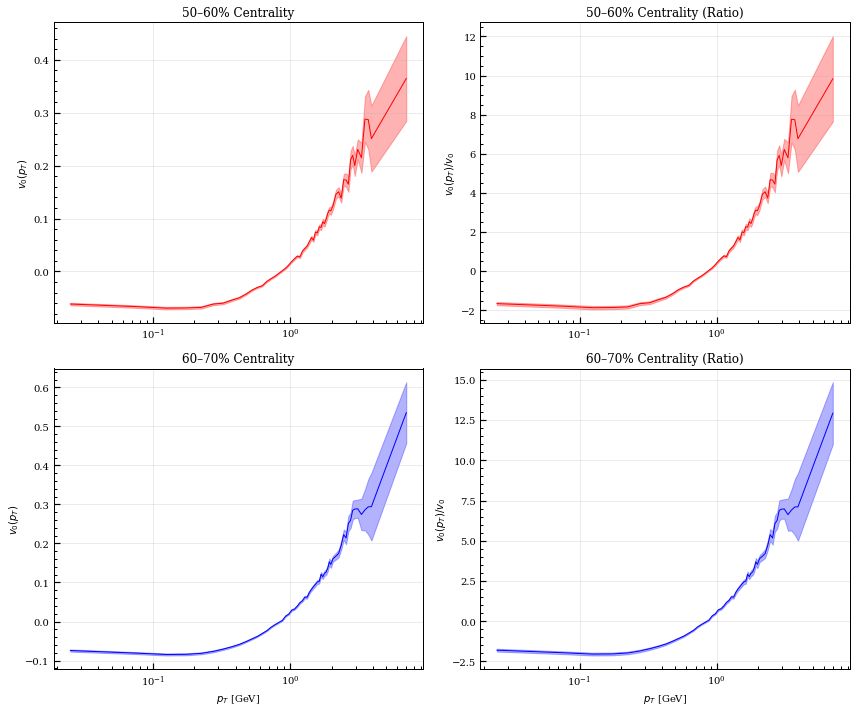

In [5]:
### Plotting theoretical predictions (bands) ### 
 
import matplotlib.pyplot as plt

# Centralities to plot
cents = ["50-60%", "60-70%"]

colors = {
    "50-60%": "red",
    "60-70%": "blue"
}

# -------------------------
# Create 2×2 figure
# -------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
(ax11, ax12), (ax21, ax22) = axes

# Panel mapping:
# ax11 = 50-60% v0(pT)
# ax12 = 50-60% ratio
# ax21 = 60-70% v0(pT)
# ax22 = 60-70% ratio

# Helper to draw band
def plot_band(ax, x, y, yerr, label, color):
    ax.plot(x, y, color=color, label=label)
    ax.fill_between(x, y - yerr, y + yerr, color=color, alpha=0.3)

# ---- 50–60% ----
cent = "50-60%"
plot_band(ax11, ptlist, v0pT[cent], v0pT_err[cent], "$v_0(p_T)$", colors[cent])
ax11.set_xscale("log")
ax11.set_ylabel("$v_0(p_T)$")
ax11.set_title("50–60% Centrality")
ax11.grid(True, alpha=0.3)

plot_band(ax12, ptlist, ratio[cent], ratio_err[cent], "$v_0(p_T)/v_0$", colors[cent])
ax12.set_xscale("log")
ax12.set_ylabel("$v_0(p_T)/v_0$")
ax12.set_title("50–60% Centrality (Ratio)")
ax12.grid(True, alpha=0.3)

# ---- 60–70% ----
cent = "60-70%"
plot_band(ax21, ptlist, v0pT[cent], v0pT_err[cent], "$v_0(p_T)$", colors[cent])
ax21.set_xscale("log")
ax21.set_xlabel("$p_T$ [GeV]")
ax21.set_ylabel("$v_0(p_T)$")
ax21.set_title("60–70% Centrality")
ax21.grid(True, alpha=0.3)

plot_band(ax22, ptlist, ratio[cent], ratio_err[cent], "$v_0(p_T)/v_0$", colors[cent])
ax22.set_xscale("log")
ax22.set_xlabel("$p_T$ [GeV]")
ax22.set_ylabel("$v_0(p_T)/v_0$")
ax22.set_title("60–70% Centrality (Ratio)")
ax22.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


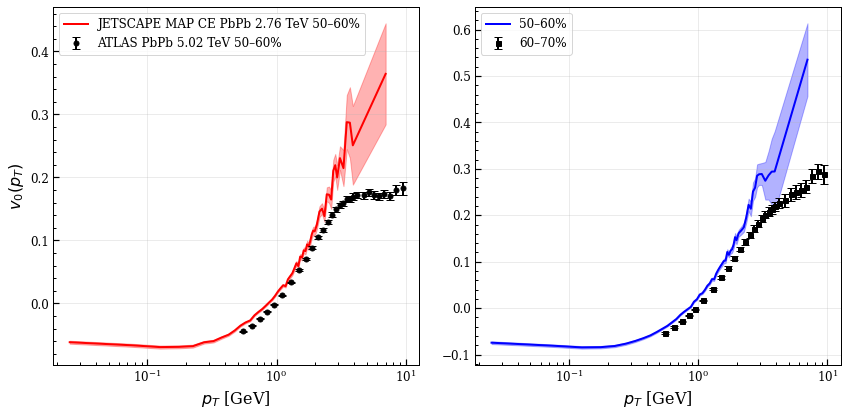

In [32]:
### Plotting theoretical predictions (bands) + Experimental data ###

plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
})

# Centralities to plot
cents = ["50-60%", "60-70%"]

colors = {
    "50-60%": "red",
    "60-70%": "blue"
}

# -------------------------
# Create 1×2 figure
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
(ax11, ax12) = axes

# Helper to draw band
def plot_band(ax, x, y, yerr, label, color):
    ax.plot(x, y, color=color, label=label)
    ax.fill_between(x, y - yerr, y + yerr, color=color, alpha=0.3)

# --------------------------------------------------
# 50–60% CENTRALITY
# --------------------------------------------------
cent = "50-60%"

# ---- Model band v0(pT) ----
plot_band(ax11, ptlist, v0pT[cent], v0pT_err[cent], r"JETSCAPE MAP CE PbPb 2.76 TeV 50–60%", colors[cent])

# ---- Experimental data v0(pT) ----
ax11.errorbar(
    cent7["pT"], cent7["v0"], yerr=total_err7,
    fmt="o", markersize=5, color="black",
    capsize=4, label="ATLAS PbPb 5.02 TeV 50–60%"
)

ax11.set_xscale("log")
ax11.set_xlabel("$p_T$ [GeV]")
ax11.set_ylabel("$v_0(p_T)$")
ax11.grid(True, alpha=0.3)
ax11.legend(loc='upper left')

cent = "60-70%"

plot_band(ax12, ptlist, v0pT[cent], v0pT_err[cent], "50–60%", colors[cent])

# Experimental
ax12.errorbar(
    cent8["pT"], cent8["v0"], yerr=total_err8,
    fmt="s", markersize=5, color="black",
    capsize=4, label="60–70%"
)

ax12.set_xscale("log")
ax12.set_xlabel("$p_T$ [GeV]")
#ax12.set_title("60–70% Centrality")
ax12.grid(True, alpha=0.3)
ax12.legend(loc='upper left')

plt.tight_layout()
plt.savefig("v0pT_ATLAS_comparison.pdf", dpi=600, bbox_inches="tight")
plt.show()

**This looks horrible!** Maybe we expect an overprediction because we're comparing different collision energies. CMS data for Pb+Pb 2.76 TeV looks to be above ATLAS Pb+Pb 5.02 TeV data.   


Next Steps: 
* Now, I want to make predictions at the same pt bins as the experimental data
* To train emulators for all viscous corrections available: Grad, CE, PTM, and PTB.
* Make emulator predictions for the differential radial flow coefficient and compare them